array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Best road lenght:  44
Time to get:  0.5996818542480469
[0,0] -> [2,2] -> [5,3] -> [6,6] -> [13,6] -> [6,7] -> [4,7] -> [6,11] -> [4,14] -> [0,14]
Heu road lenght:  51
Relative Error:  15.909090909090908 %
Time to get:  0.002286195755004883
[0,0] -> [2,2] -> [5,3] -> [6,6] -> [6,7] -> [4,7] -> [6,11] -> [4,14] -> [0,14] -> [13,6]


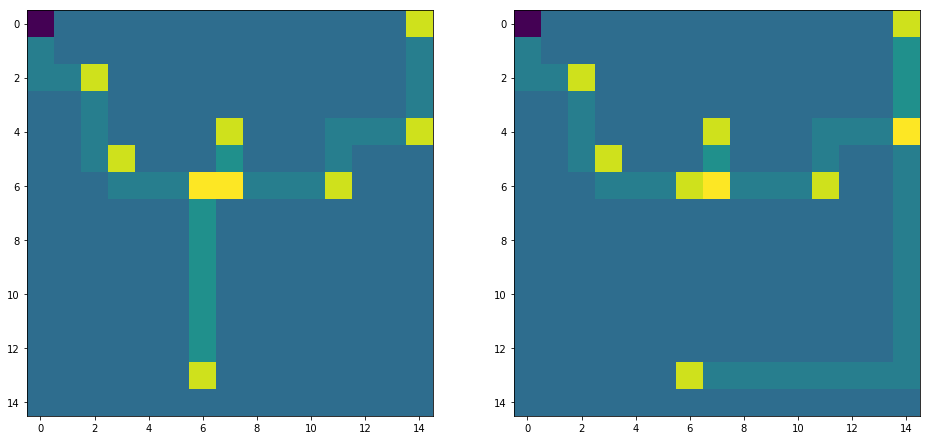

In [75]:
import sys
import time
import math
import copy
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import sparse
from scipy.sparse import csgraph
from scipy.spatial import distance


x = 15
y = 15
pocatek = (0,0,0)
matrixDensity = 0.04
points = [pocatek]
cnt = 1

def gen_random_matrix(x, y, density):
    n = int(x * y * matrixDensity)
    space = np.zeros((x*y), dtype=int)
    rngX = np.random.choice(range(x*y), n, replace=False)
    for i in rngX:
        space[i] = 1
    space = space.reshape(x, y)
    return space

def count_distance_matrix_for_waste(space, points, cnt):
    distanceMatrix = np.zeros(1, dtype=int)
    for i in range(len(space)):
        for j in range(len(space[i])):
            if space[i][j] == 1:
                distanceMatrix_t = np.zeros((len(distanceMatrix)+1,len(distanceMatrix)+1), dtype=int)       
                distanceMatrix_t[:-1, :-1] = distanceMatrix
                distanceMatrix = distanceMatrix_t
                pointNumber = len(points)
                for point in range(len(points)):
                    distanceMatrix[pointNumber][point] = distance.cityblock(points[point][:-1], (i, j))
                    distanceMatrix[point][pointNumber] = distance.cityblock(points[point][:-1], (i, j))
                points.append((i, j, cnt))
                cnt += 1
    return distanceMatrix
    
class BestRoad:
    best = sys.maxsize
    road = []
    
class HeuRoad:
    best = sys.maxsize
    road = []
       
def find_shortest_way(dMatrix, actPoint, leftPoints, roadLen, road):
    if BestRoad.best <= roadLen: return
    if len(leftPoints)==0:
        BestRoad.best = roadLen
        BestRoad.road = road
        return 
    
    leftPoints = sorted(leftPoints, key=lambda x: dMatrix[actPoint[2]][x[2]])
    for i in leftPoints:
        find_shortest_way(dMatrix, i, [x for x in leftPoints if x != i], 
                          roadLen+dMatrix[actPoint[2]][i[2]], road + [i])
    
def go_for_nearest(dMatrix, actPoint, roadLen, road, done):
    if HeuRoad.best <= roadLen: return
    sortedTo = [(i, j) for i,j in enumerate(dMatrix[actPoint]) if i not in done]
    if len(sortedTo)==0:
        HeuRoad.best = roadLen
        HeuRoad.road = road
        return
    sortedTo = sorted(sortedTo, key=lambda x: x[-1])
    done.append(sortedTo[0][0])
    go_for_nearest(dMatrix, sortedTo[0][0], roadLen+sortedTo[0][1], road + [points[sortedTo[0][0]]], done)

        
space = gen_random_matrix(x, y, matrixDensity)
dMatrix = count_distance_matrix_for_waste(space, points, cnt)
display(space)
#display(dMatrix)

t1 = time.time()
find_shortest_way(dMatrix, pocatek, points[1:], 0, [points[0]])

print("Best road lenght: ", BestRoad.best)
print("Time to get: ", time.time()-t1)
print(" -> ".join(["[{},{}]".format(x[0], x[1]) for x in BestRoad.road]))

t1 = time.time()
go_for_nearest(dMatrix, 0, 0, [points[0]], [pocatek[2]])

print("Heu road lenght: ", HeuRoad.best)
print("Relative Error: ", abs((BestRoad.best - HeuRoad.best) / BestRoad.best)*100, '%')
print("Time to get: ", time.time()-t1)
print(" -> ".join(["[{},{}]".format(x[0], x[1]) for x in HeuRoad.road]))


def colorSpace(space, points):
    x = 0
    y = 0
    for i in [[points[x], points[x+1]] for x in range(len(points)-1)]:
        x, y, o = i[0]
        a, b, o = i[1]
        
        while True:
            space[x][y] = space[x][y] + 1
            if x < a:
                x += 1
                continue
            if x > a:
                x -= 1
                continue
            if y < b:
                y += 1
                continue
            if y > b:
                y -= 1
                continue
            break
    space[x][y] = space[x][y] + 1
           

space = space * 6
space[pocatek[0]][pocatek[1]] = -6
space2 = copy.deepcopy(space)
colorSpace(space, BestRoad.road)
colorSpace(space2, HeuRoad.road)


fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(space, interpolation='nearest')

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(space2, interpolation='nearest')

plt.show()